In [1]:
import sys
!{sys.executable} -m pip install shapwaterfall==0.1.4

In [2]:
# University of California, Irvine House Votes Data Example
# packages
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import shap
import matplotlib.pyplot as plt
import waterfall_chart
from shapwaterfall import shapwaterfall

# models
rf_clf = RandomForestClassifier()

# UCI Data 
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data')

names = ['Republican', 'handicap infants', 'water project', 'budget resolution', 'physician fee freeze', 'el salvador aide', 'school religious groups', 'anti satellite', 'nicaraguan contras', 'mx missle', 'immigration', 'synfuels', 'education spending', 'superfund', 'crime', 'duty free exports', 'south africa']

df.columns = names
df = df.replace(to_replace =["republican", "y"], value = 1) 
df = df.replace(to_replace =["democrat", "n", "?"], value = 0) 

label = df.iloc[:,0]
features = df.iloc[:,1:17]

# data splits
X_tng, X_val, y_tng, y_val = train_test_split(features, label, test_size=0.33, random_state=42)

print(X_tng.shape)
print(X_val.shape)

# fit classifiers and measure AUC
clf = rf_clf.fit(X_tng, y_tng)

pred_rf = clf.predict_proba(X_val)
score_rf = roc_auc_score(y_val,pred_rf[:,1])
print(score_rf, 'Random Forest AUC')


(290, 16)
(144, 16)
0.9897119341563786 Random Forest AUC


In [3]:
# IMPORTANT: add a 'Reference' column to the val/test/score data
X_val = pd.DataFrame(X_val)
X_val['Reference'] = X_val.index
print(X_val.shape)

(144, 17)


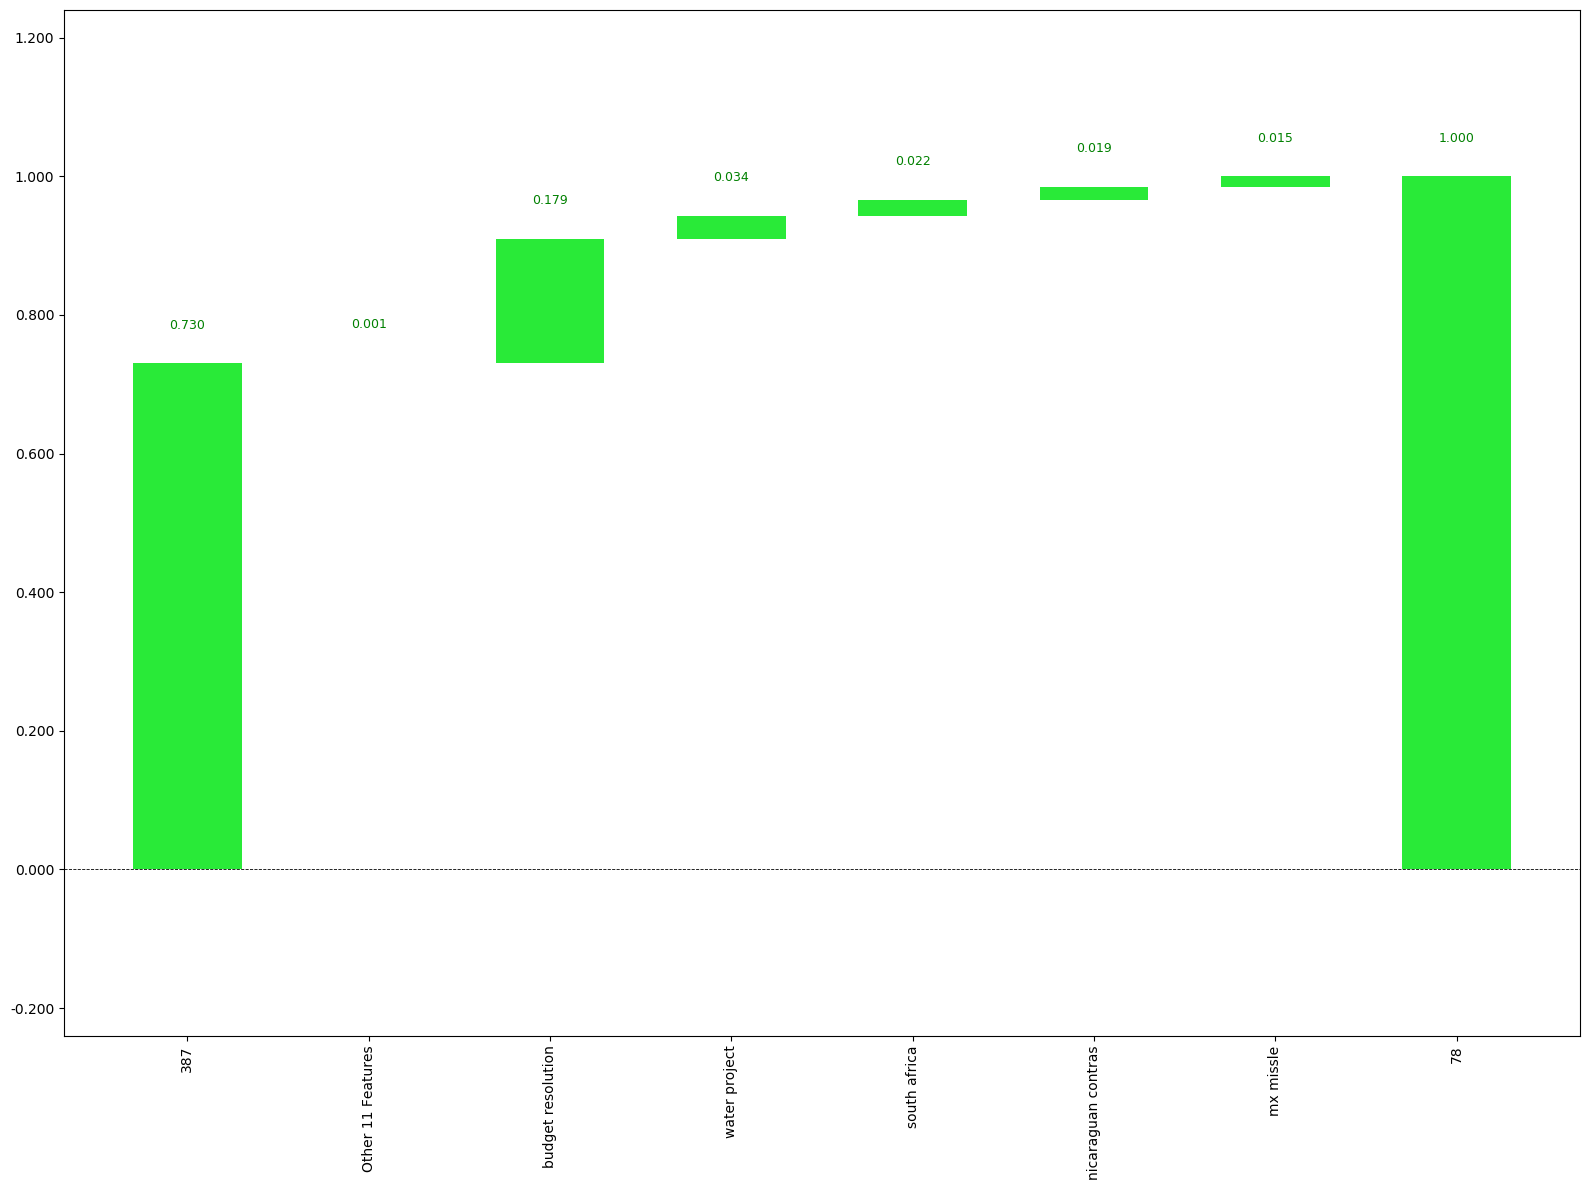

In [4]:
# Use Case 3
shapwaterfall(clf, X_tng, X_val, 78, 387, 5)

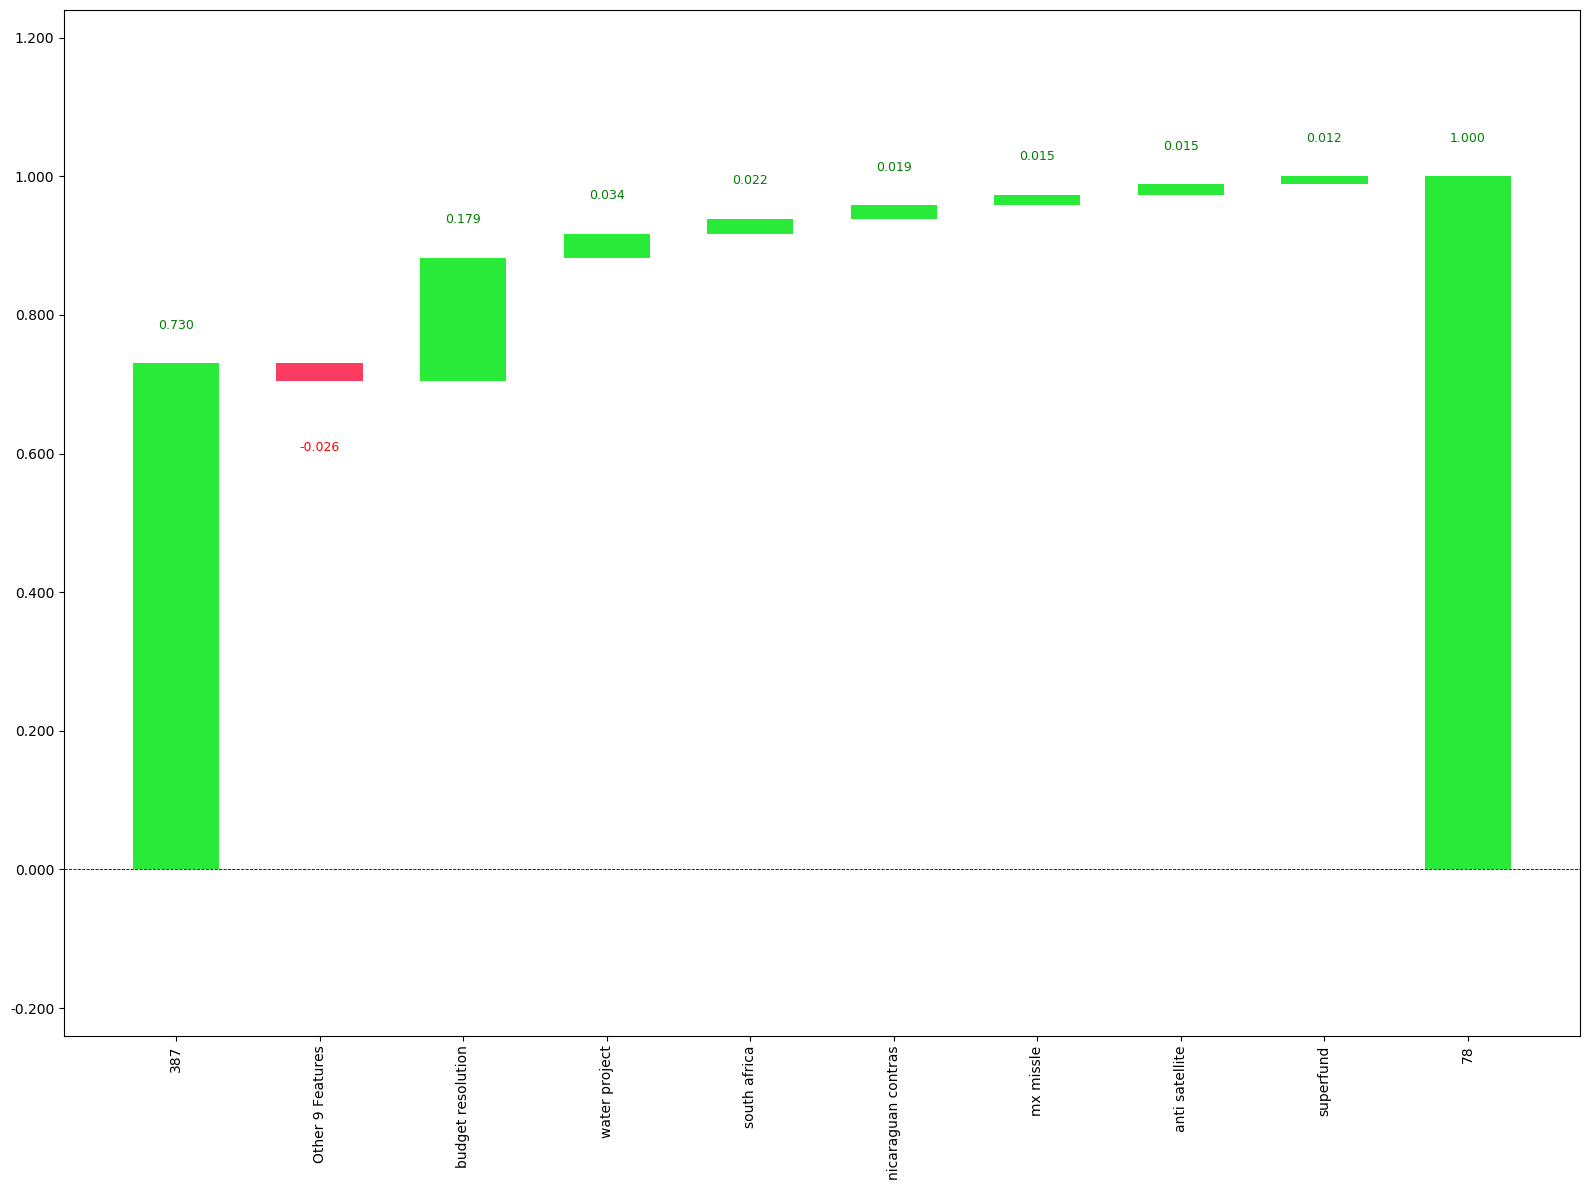

In [5]:
shapwaterfall(clf, X_tng, X_val, 387, 78, 7)

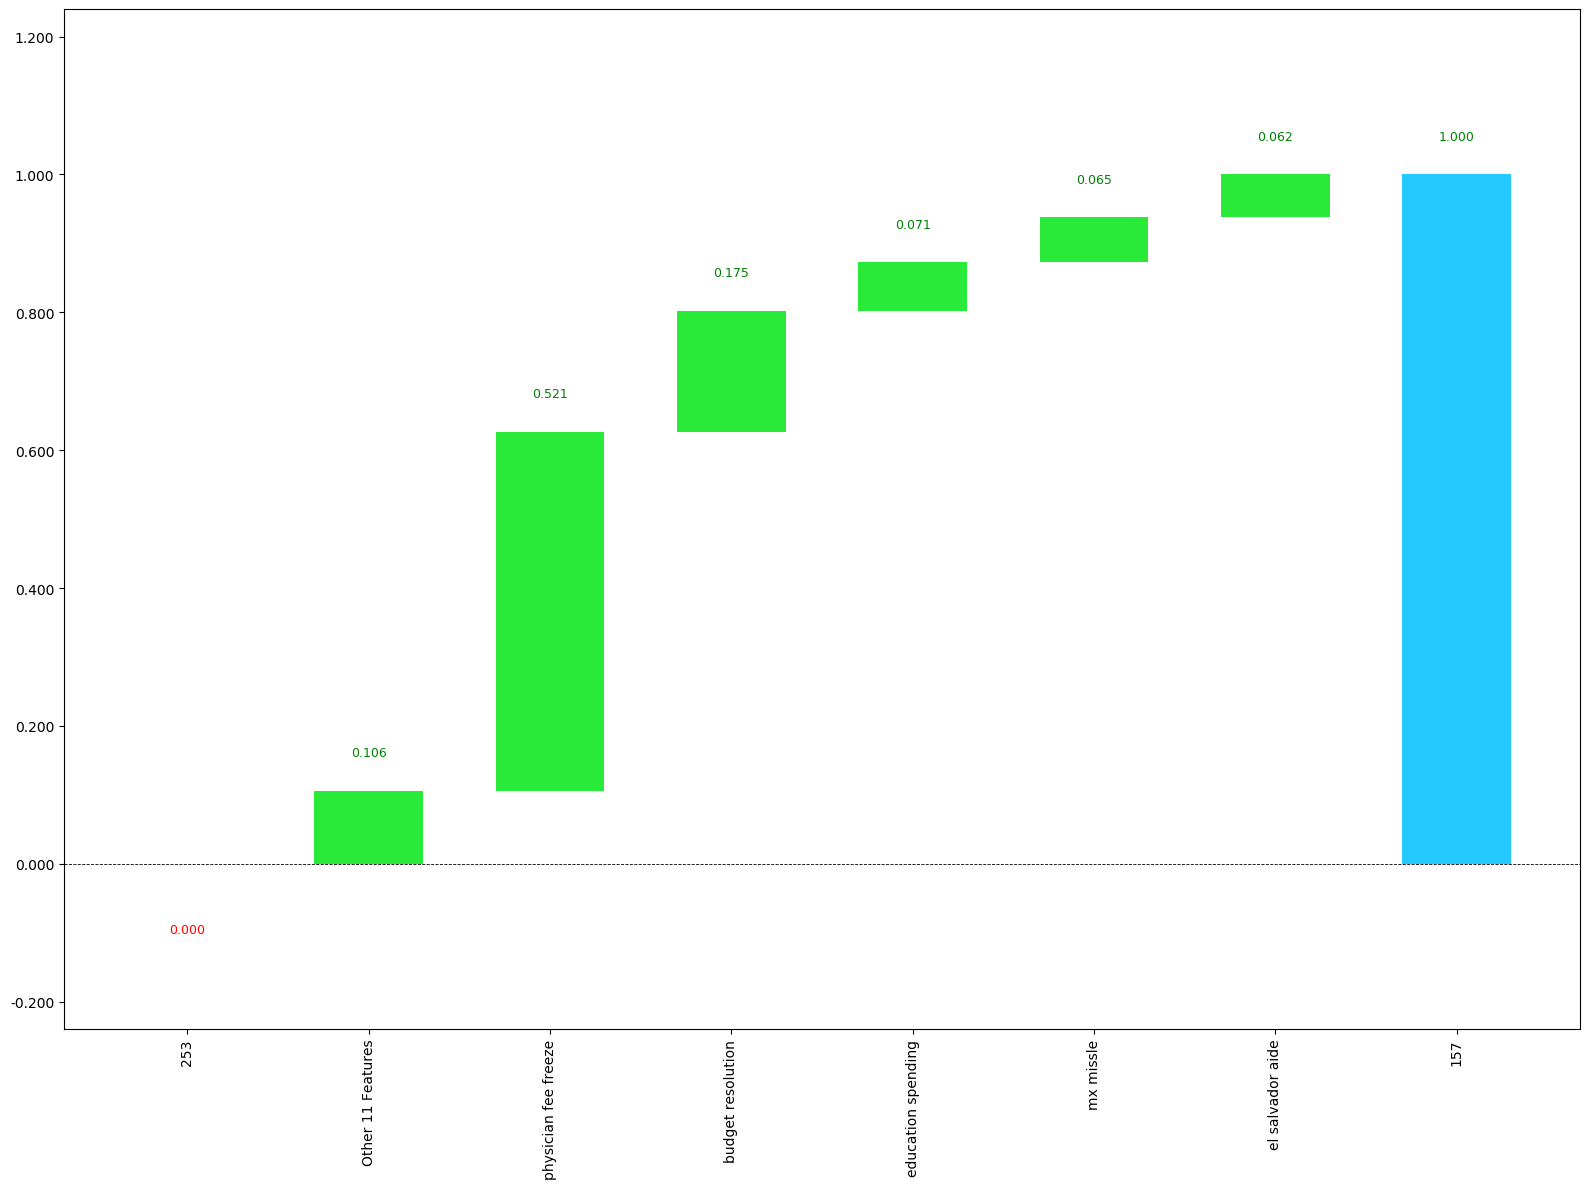

In [6]:
# Use Case 4
shapwaterfall(clf, X_tng, X_val, 253, 157, 5)

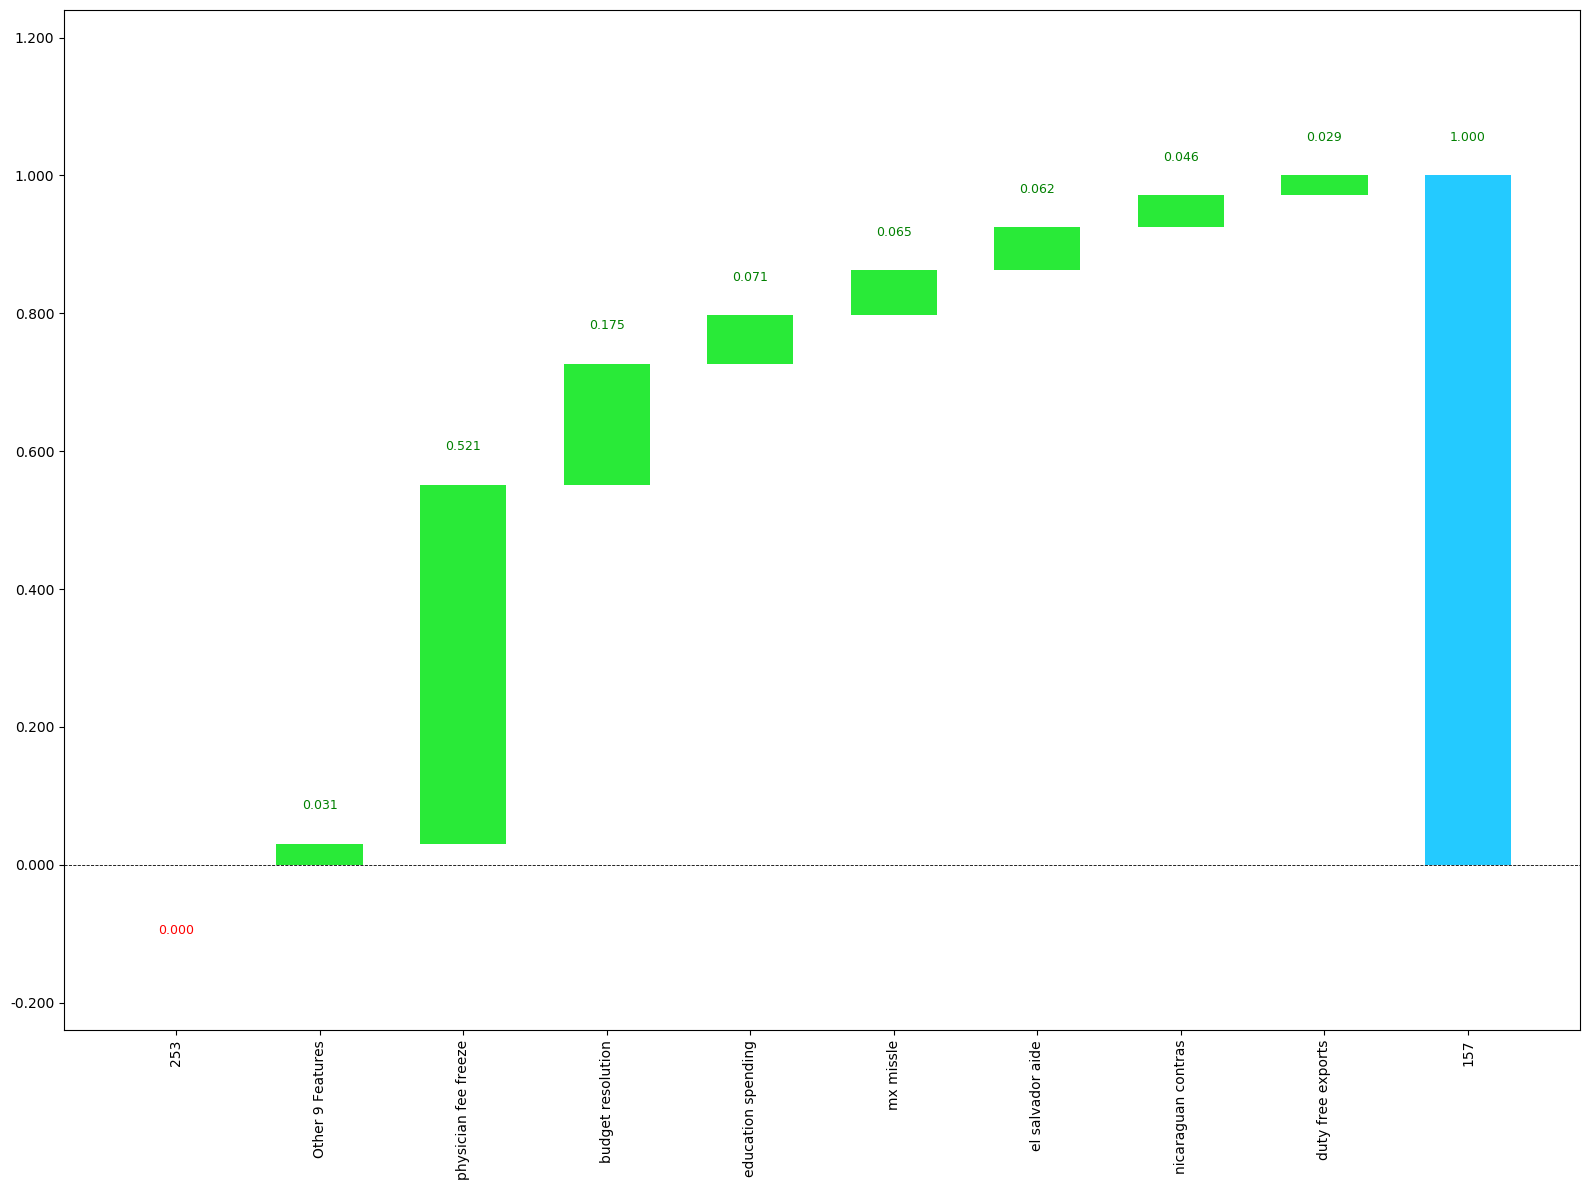

In [7]:
shapwaterfall(clf, X_tng, X_val, 157, 253, 7)